In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_input=pd.read_hdf('galadriel_dataset.h5','df_input')
df_time=pd.read_hdf('galadriel_dataset.h5','df_time')
df_freq_int=pd.read_hdf('galadriel_dataset.h5','df_freq_int')

#get the arrays and print them
print('Input DF')
print(df_input)

print('----')
print('Time values')
df_time_val=df_time.loc[0]
print(df_time_val)

print('----')
print("Intensity")
df_time= df_time.drop([0]) #drop the time values
df_time.reset_index(inplace=True,drop=True) #to start again from 0 (as the other DataFrames)
#df_time = df_time.drop('index', axis=1)
print(df_time)

print('----')
print("Freq values")
df_freq_val=df_freq_int.loc[0]
print(df_freq_val)

print('----')
print("Frequency intesity")
df_freq_int= df_freq_int.drop([0]) #drop the freq values
df_freq_int.reset_index(inplace=True,drop=True)
#df_freq_int = df_freq_int.drop('index', axis=1)
print(df_freq_int)

Input DF
       shot number  order2  order3     order4
0             4731   34900  -17000 -3700000.0
1             4733   34900  -17000 -4600000.0
2             4734   34900  -17000 -4600000.0
3             4735   34900  -17000 -4600000.0
4             4736   34900  -17000 -4500000.0
...            ...     ...     ...        ...
12156        17147   35300   20000 -3800000.0
12157        17148   35300   20000 -3800000.0
12158        17149   35300   20000 -3800000.0
12159        17150   35300   20000 -3700000.0
12160        17151   35300   20000 -3700000.0

[12161 rows x 4 columns]
----
Time values
0    -94.466005
1    -83.969782
2    -73.473559
3    -62.977336
4    -52.481114
5    -41.984891
6    -31.488668
7    -20.992445
8    -10.496223
9      0.000000
10    10.496223
11    20.992445
12    31.488668
13    41.984891
14    52.481114
15    62.977336
16    73.473559
17    83.969782
18    94.466005
Name: 0, dtype: float64
----
Intensity
             0         1         2         3         

In [3]:
df_input.describe()

,shot number,order2,order3,order4
count,12161.000000,12161.000000,12161.000000,1.216100e+04
mean,10965.164871,35096.447661,5561.549215,-4.116701e+06
std,3591.258098,127.222524,13404.818521,2.909204e+05
min,4731.000000,34900.000000,-17000.000000,-4.600000e+06
25%,7858.000000,35000.000000,-6000.000000,-4.400000e+06
50%,10972.000000,35100.000000,5000.000000,-4.100000e+06
75%,14080.000000,35200.000000,17000.000000,-3.900000e+06
max,17151.000000,35300.000000,29000.000000,-3.600000e+06


## Plot a random shot

Text(0.5, 1.0, 'Frequency')

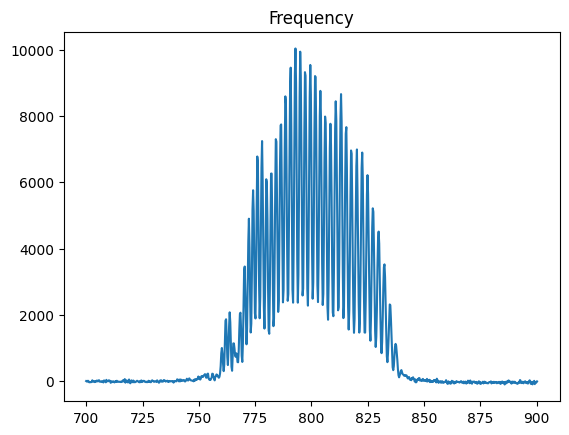

In [4]:
#plot a random shot
plt.plot(df_freq_val,df_freq_int.loc[1000])
plt.title('Frequency')

Text(0.5, 1.0, 'Pulse shape')

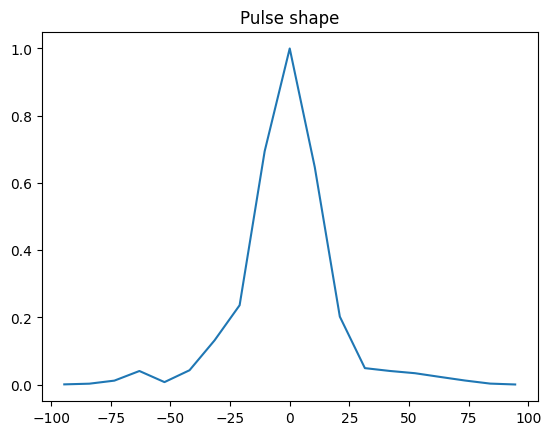

In [5]:
plt.plot(df_time_val,df_time.loc[1000])
plt.title('Pulse shape')

## Check for extreme values in the raw data

In [6]:
#look for bad datapoints in the raw data
maxval_freq=df_freq_int.max(axis=1)
for i,v in maxval_freq.items():
    if(v<8000 or v>45000):
        print(i,v)

0 6105.111328
179 7581.777832
293 7437.833496
326 7580.055664
1489 7963.055664
1604 7855.055664
1633 7810.777832
1664 7250.611328
1750 7668.166504
1752 6852.611328
4495 7774.611328
9439 45905.054687
10641 50116.222656
10852 45090.167969


Text(0, 0.5, 'Num. shots')

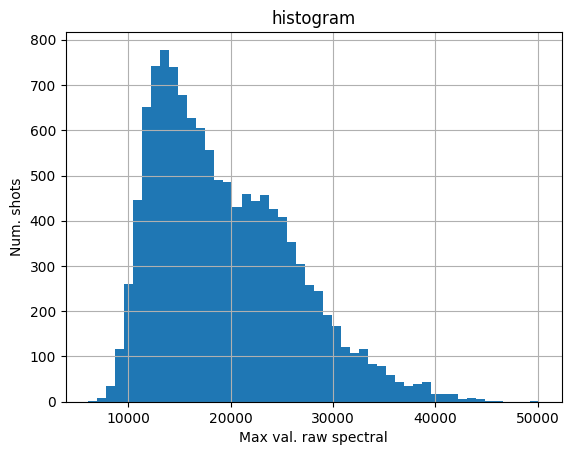

In [7]:
maxval_freq.hist(bins=50)
plt.title('histogram')
plt.xlabel('Max val. raw spectral')
plt.ylabel('Num. shots')

In [8]:
print('Mean of max val:',maxval_freq.mean())
print('Std deviation:',maxval_freq.std())
print('2 X std deviation:',2*maxval_freq.std())

Mean of max val: 19483.43792341238
Std deviation: 6741.561161972222
2 X std deviation: 13483.122323944444


### Higest spectral

15628


Text(0.5, 1.0, 'Frequency shot #15628')

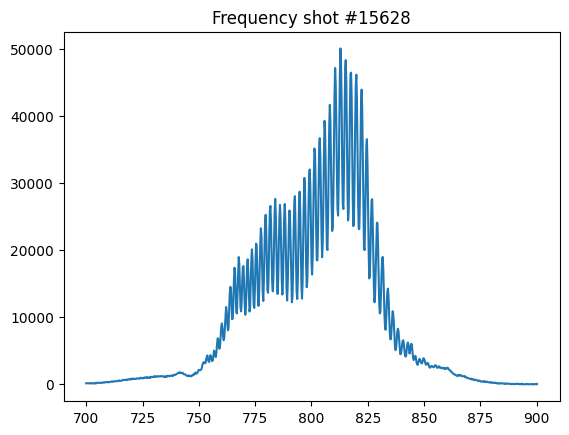

In [9]:
index_shot=10641
num_shot=df_input['shot number'].loc[index_shot]
print(num_shot)
plt.plot(df_freq_val,df_freq_int.loc[index_shot])
#plt.plot(df_freq_val,df_freq_int.loc[1605])
plt.title('Frequency shot #'+str(num_shot))

Text(0.5, 1.0, 'Pulse shape shot #15628')

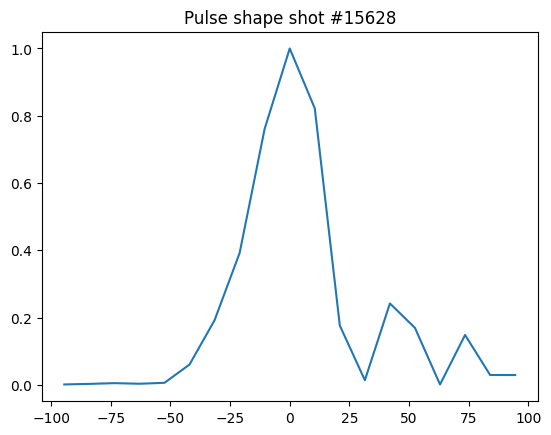

In [10]:
plt.plot(df_time_val,df_time.loc[index_shot])
#plt.plot(df_time_val,df_time.loc[1605])
plt.title('Pulse shape shot #'+str(num_shot))

### Lowest spectral

6534


Text(0.5, 1.0, 'Frequency shot #6534')

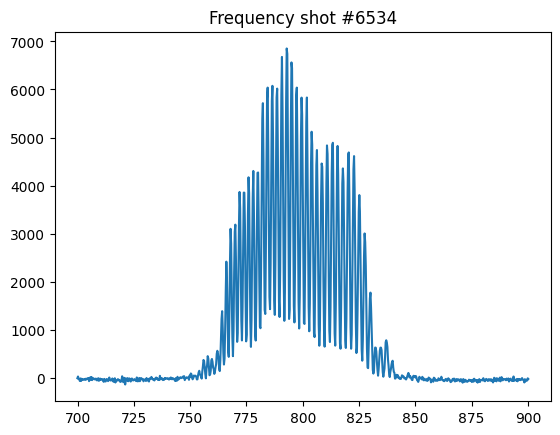

In [11]:
index_shot=1752
num_shot=df_input['shot number'].loc[index_shot]
print(num_shot)
plt.plot(df_freq_val,df_freq_int.loc[index_shot])
#plt.plot(df_freq_val,df_freq_int.loc[1605])
plt.title('Frequency shot #'+str(num_shot))

Text(0.5, 1.0, 'Pulse shape shot #6534')

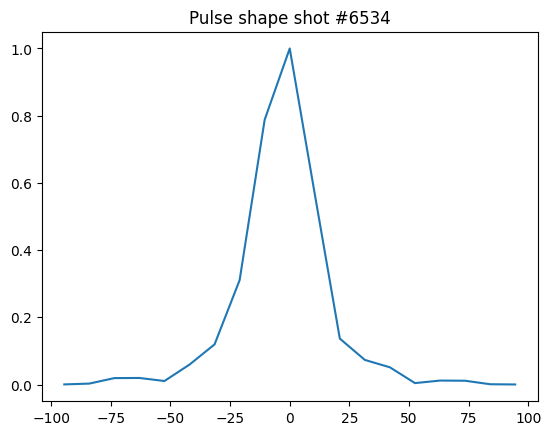

In [12]:
plt.plot(df_time_val,df_time.loc[index_shot])
#plt.plot(df_time_val,df_time.loc[1605])
plt.title('Pulse shape shot #'+str(num_shot))

In [13]:
#check neighbor shots
index_shot=1752
df_input.loc[index_shot-2:index_shot+2]
#print(num_shot)

,shot number,order2,order3,order4
1750,6532,34950,-5000,-3700000.0
1751,6533,34950,-5000,-3600000.0
1752,6534,34950,-4000,-4600000.0
1753,6535,34950,-4000,-4600000.0
1754,6536,34950,-4000,-4500000.0


### Ploting the lowest spectrum with its neighbor (same input parameters)

6534


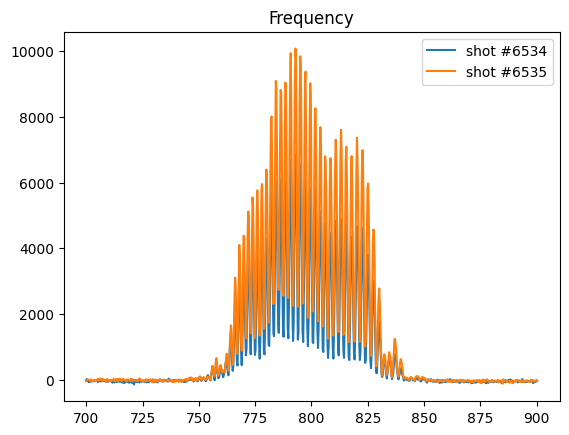

In [14]:
#plot the two shots with the same input
index_shot=1752
num_shot=df_input['shot number'].loc[index_shot]
print(num_shot)
plt.plot(df_freq_val,df_freq_int.loc[index_shot],label='shot #'+str(num_shot))
plt.plot(df_freq_val,df_freq_int.loc[index_shot+1],label='shot #'+str(num_shot+1))
#plt.plot(df_freq_val,df_freq_int.loc[1605])
plt.title('Frequency')
plt.legend()

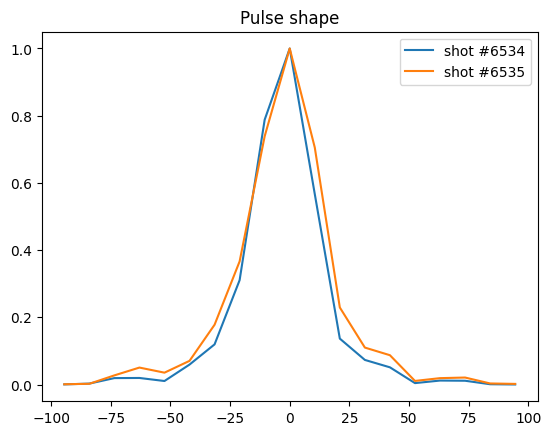

In [15]:
plt.plot(df_time_val,df_time.loc[index_shot],label='shot #'+str(num_shot))
plt.plot(df_time_val,df_time.loc[index_shot+1],label='shot #'+str(num_shot+1))
plt.title('Pulse shape')
plt.legend()

## Removing the extreme values

We have decided to drop all the shots that are outside of the 'mean +- 2sigma' in the max val in raw data

In [16]:
maxval_freq=df_freq_int.max(axis=1)
meanval=maxval_freq.mean()
twosigma=2*maxval_freq.std()
print('Shot with max val outside of this range will be discarded',meanval-twosigma,meanval+twosigma)

Shot with max val outside of this range will be discarded 6000.315599467936 32966.56024735683


In [17]:
#get the indexes of the shots that don't fulfilll the requirement
#badpoints=maxval_freq.index[(maxval_freq>meanval-twosigma) and (maxval_freq<meanval+twosigma)].tolist()
badpoints_up=maxval_freq.index[(maxval_freq>(meanval+twosigma))].tolist()
badpoints_down=maxval_freq.index[(maxval_freq<(meanval-twosigma))].tolist()
maxval_freq_clean=maxval_freq.drop(badpoints_up)
maxval_freq_clean=maxval_freq_clean.drop(badpoints_down)

<Axes: >

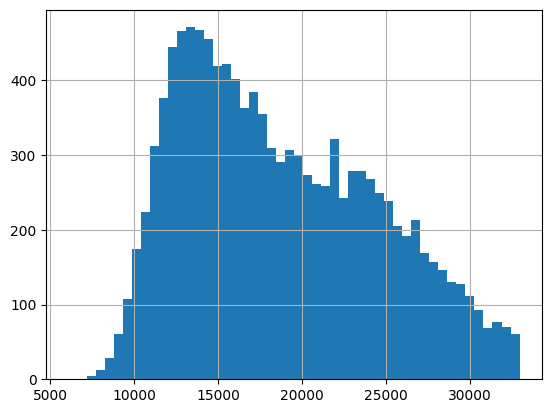

In [18]:
maxval_freq_clean.hist(bins=50)

In [19]:
#get the maximum values from the raw data
maxval_freq=df_freq_int.max(axis=1)
meanval=maxval_freq.mean()
twosigma=2*maxval_freq.std()
print('Shot with max val outside of this range will be discarded',meanval-twosigma,'to',meanval+twosigma)

#get the indexes of the shots that don't fulfilll the requirement
badpoints_up=maxval_freq.index[(maxval_freq>(meanval+twosigma))].tolist()
badpoints_down=maxval_freq.index[(maxval_freq<(meanval-twosigma))].tolist()
#maxval_freq_clean=maxval_freq.drop(badpoints_up)
#maxval_freq_clean=maxval_freq_clean.drop(badpoints_down)

#Drop those shots from the databases
df_input_clean=df_input.drop(badpoints_up)
df_input_clean=df_input_clean.drop(badpoints_down)

df_time_clean=df_time.drop(badpoints_up)
df_time_clean=df_time_clean.drop(badpoints_down)

df_freq_int_clean=df_freq_int.drop(badpoints_up)
df_freq_int_clean=df_freq_int_clean.drop(badpoints_down)

#reset their indexes
df_input_clean.reset_index(inplace=True,drop=True) #to start again from 0 (as the other DataFrames)
df_time_clean.reset_index(inplace=True,drop=True)
df_freq_int_clean.reset_index(inplace=True,drop=True)

#TESTING
#print('Testing!')
#print(df_freq_int_clean)
#test the histogram
#test_maxval_freq=df_freq_int_clean.max(axis=1)
#test_maxval_freq.hist(bins=50)

Shot with max val outside of this range will be discarded 6000.315599467936 to 32966.56024735683



Shots with max val below 8000 will be discarded



<Axes: >

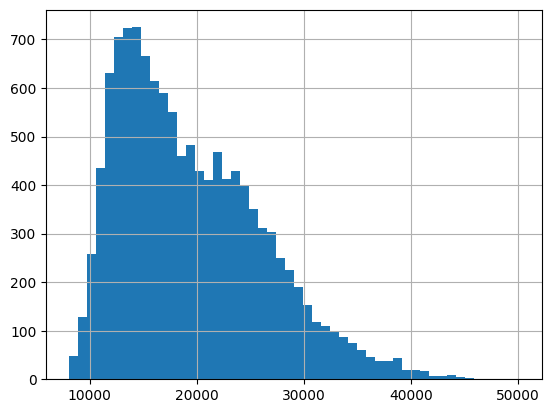

In [20]:
#get the maximum values from the raw data
maxval_freq=df_freq_int.max(axis=1)
meanval=maxval_freq.mean()
twosigma=2*maxval_freq.std()
print('')
print('Shots with max val below 8000 will be discarded')
print('')

#get the indexes of the shots that don't fulfilll the requirement
#badpoints_up=maxval_freq.index[(maxval_freq>(meanval+twosigma))].tolist()
badpoints_down=maxval_freq.index[(maxval_freq<8000)].tolist()

#Drop those shots from the databases
df_input_clean=df_input.drop(badpoints_down)

df_time_clean=df_time.drop(badpoints_down)

df_freq_int_clean=df_freq_int.drop(badpoints_down)

#reset their indexes
df_input_clean.reset_index(inplace=True,drop=True) #to start again from 0 (as the other DataFrames)
df_time_clean.reset_index(inplace=True,drop=True)
df_freq_int_clean.reset_index(inplace=True,drop=True)

#TESTING
#print('Testing!')
#print(df_freq_int_clean)
#test the histogram
test_maxval_freq=df_freq_int_clean.max(axis=1)
test_maxval_freq.hist(bins=50)

## DUPLICATE SHOTS ANALYSIS

In [21]:
#get the shot number from the test index
#(potential bug: pass the right df_input that has been used to create y_test. For example: df_input_clean)
def get_shot_num(shot_index,y_test,df_input):
    #print(y_test.iloc[shot_index])
    #print(y_test.iloc[shot_index])
    id_value=y_test.iloc[shot_index].name
    #print(df_time_clean.loc[id_value])
    #print(y_test_reset.loc[shot_index])
    #print(df_input_clean.loc[id_value])
    return(df_input['shot number'].loc[id_value])

In [22]:
#The function calculates the variance from the shots with the same input parameters and store it in a DF with SAME size (so there is redundant data)
#dup_shots should be the maximum number of duplicate shots (-1) but is OK if higher (but slower algorithm)

def get_var(df_input,df_time,dup_shots):
    list_aux=[]
    for index,row in df_input.iterrows():
        o2=row['order2']
        o3=row['order3']
        o4=row['order4']
        #check if the previous and following rows were the same
        time_list=[]
        for i in range(index-dup_shots,index+dup_shots+1):
            if (i>=0 and i<=len(df_input)-1):
                #print(index,dup_shots,i)
                df_aux=df_input.iloc[i] #row to check
                if (df_aux['order2']==o2 and df_aux['order3']==o3 and df_aux['order4']==o4):
                    time_list.append(df_time.iloc[i].to_list()) #store the rows with same parameters in a list
        time_list=np.array(time_list)
        time_list=np.var(time_list,axis=0)
        list_aux.append(time_list)
            
    #create the dataframe from the list
    df_time_var=pd.DataFrame(list_aux)
    #print(df_time)
    #print(df_time_var)
    return df_time_var

In [23]:
dup_shots=2 #max number of duplicate shots -1
df_time_var = get_var(df_input,df_time,dup_shots)

In [24]:
df_time_var_sum=df_time_var.sum(axis=1)

Text(0.5, 1.0, 'Histogram      (total num. shots=12161)')

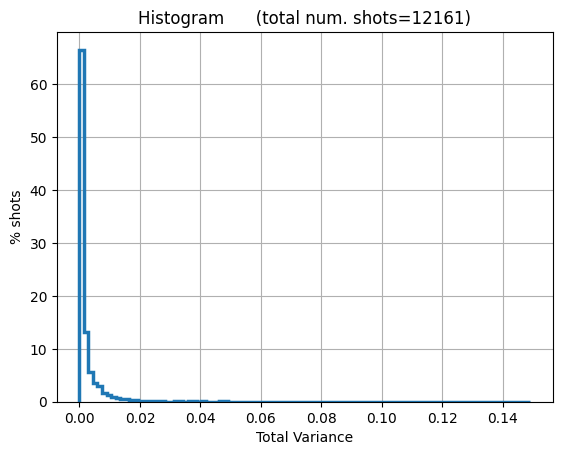

In [25]:
weights_time = 100*np.ones_like(df_time_var_sum) / len(df_time_var_sum)
df_time_var_sum.hist(bins=100,weights=weights_time,histtype="step",linewidth=2.5)
plt.ylabel('% shots')
plt.xlabel('Total Variance')
plt.title('Histogram      (total num. shots='+str(len(df_time_var_sum))+')')

In [26]:
for index, value in df_time_var_sum.items():
    if (value>0.04):
        print (index,value)

5261 0.046852879136444446
5262 0.046852879136444446
5263 0.046852879136444446
6608 0.063527737095
6609 0.063527737095
7723 0.05323627510825001
7724 0.05323627510825001
9011 0.11144555945799998
9012 0.11144555945799998
9013 0.11144555945799998
9041 0.04729444332688889
9042 0.04729444332688889
9043 0.04729444332688889
9065 0.06621892538244446
9066 0.06621892538244446
9067 0.06621892538244446
9095 0.05191854128755554
9096 0.05191854128755554
9097 0.05191854128755554
9157 0.04075770301511111
9158 0.04075770301511111
9159 0.04075770301511111
9164 0.09334614773275
9165 0.09334614773275
9277 0.04934899088844445
9278 0.04934899088844445
9279 0.04934899088844445
9400 0.1385383034265
9401 0.1385383034265
10339 0.04869791480325001
10340 0.04869791480325001
10488 0.14906005156449995
10489 0.14906005156449995
10518 0.13401479240575
10519 0.13401479240575
10600 0.06883848608733333
10601 0.06883848608733333
10602 0.06883848608733333
10723 0.042859404366222244
10724 0.042859404366222244
10725 0.042859

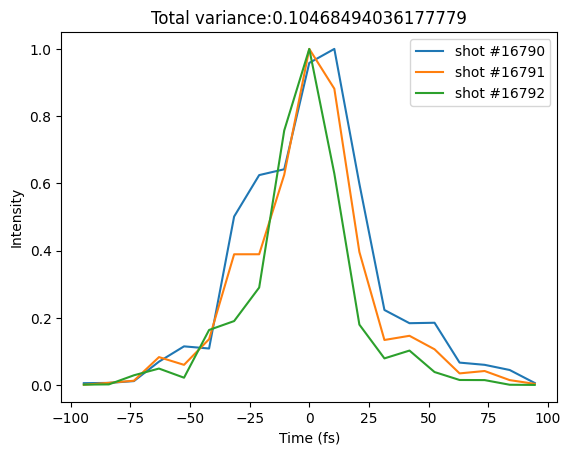

In [27]:
#plot shots with large variance
shot_index1=11801
shot_index2=11802
shot_index3=11803
shot_numb1=get_shot_num(shot_index1,df_time,df_input)
shot_numb2=get_shot_num(shot_index2,df_time,df_input)
shot_numb3=get_shot_num(shot_index3,df_time,df_input)
plt.plot(df_time_val,df_time.loc[shot_index1],label='shot #'+str(shot_numb1))
plt.plot(df_time_val,df_time.loc[shot_index2],label='shot #'+str(shot_numb2))
plt.plot(df_time_val,df_time.loc[shot_index3],label='shot #'+str(shot_numb3))
plt.xlabel('Time (fs)')
plt.ylabel('Intensity')
plt.title('Total variance:'+str(df_time_var_sum.loc[shot_index1]))
plt.legend()

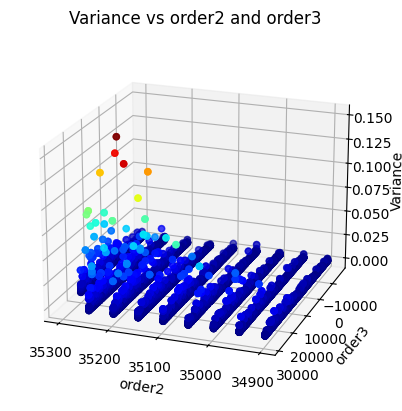

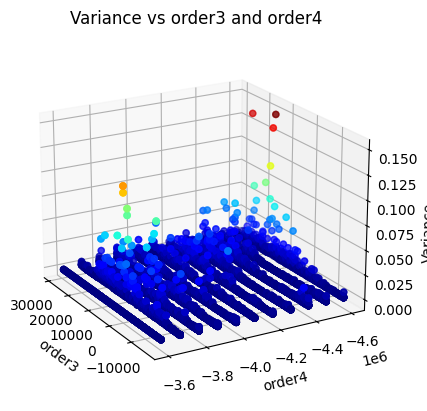

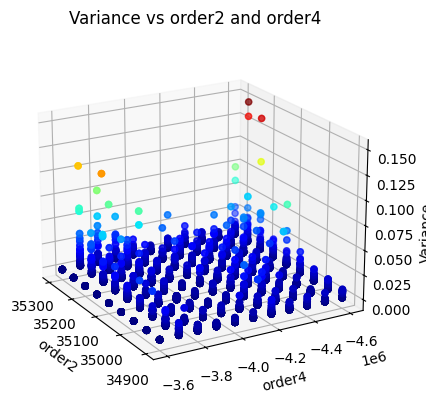

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df_input['order2'], df_input['order3'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax.set_xlabel('order2')
ax.set_ylabel('order3')
ax.set_zlabel('Variance')
ax.view_init(elev=20., azim=110)
plt.title('Variance vs order2 and order3')
plt.show()

fig = plt.figure()
ax2 = fig.add_subplot(projection='3d')
ax2.scatter(df_input['order3'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax2.set_xlabel('order3')
ax2.set_ylabel('order4')
ax2.set_zlabel('Variance')
ax2.view_init(elev=20., azim=150)
plt.title('Variance vs order3 and order4')
plt.show()

fig = plt.figure()
ax3 = fig.add_subplot(projection='3d')
ax3.scatter(df_input['order2'], df_input['order4'], df_time_var_sum,c=df_time_var_sum,cmap='jet')
ax3.set_xlabel('order2')
ax3.set_ylabel('order4')
ax3.set_zlabel('Variance')
ax3.view_init(elev=20., azim=150)
plt.title('Variance vs order2 and order4')
plt.show()